<a href="https://colab.research.google.com/github/Thanuja219/Ear-print-Biometrics/blob/main/Ear_print_Biometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 Classification Tutorial

YOLOv5 supports classification tasks too. This is the official YOLOv5 classification notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 classification on ImageNet
*  [Training YOLOv5 classification](https://blog.roboflow.com//train-YOLOv5-classification-custom-data) on custom data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/datasets/ear_rec_yolov3-2" -d "/content/drive/MyDrive/ear_rec_yolov3.v2i.folder.zip"

unzip:  cannot find or open /content/drive/MyDrive/ear_rec_yolov3.v2i.folder (2).zip, /content/drive/MyDrive/ear_rec_yolov3.v2i.folder (2).zip.zip or /content/drive/MyDrive/ear_rec_yolov3.v2i.folder (2).zip.ZIP.


# Setup

Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


# 1. Infer on ImageNet

To demonstrate YOLOv5 classification, we'll leverage an already trained model. In this case, we'll download the ImageNet trained models pretrained on ImageNet using YOLOv5 Utils.

In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

Now, we can infer on an example image from the ImageNet dataset.

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
img_data = requests.get(image_url).content
with open('bananas.jpg', 'wb') as handler:
    handler.write(img_data)

In [ ]:
#Infer using classify/predict.py
!python classify/predict.py --weights ./weigths/yolov5s-cls.pt --source bananas.jpg

classify/predict: weights=['./weigths/yolov5s-cls.pt'], source=bananas.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/classify/predict.py", line 240, in <module>
    main(opt)
  File "/content/yolov5/classify/predict.py", line 235, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/classify/predict.py", line 121, in run
    for path, im, im0s, vid_cap, s in dataset:
  File "/content/yolov5/utils/dataloaders.py", line 391, in _

From the output, we can see the ImageNet trained model correctly predicts the class `banana` with `0.95` confidence.

## 2. (Optional) Validate

Use the `classify/val.py` script to run validation for the model. This will show us the model's performance on each class.

First, we need to download ImageNet.

In [ ]:
# # WARNING: takes ~20 minutes
# !bash data/scripts/get_imagenet.sh --val

In [ ]:
# # run the validation script
# !python classify/val.py --weights ./weigths/yolov5s-cls.pt --data ../datasets/imagenet

The output shows accuracy metrics for the ImageNet validation dataset including per class accuracy.

# 3. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.




Create a free Roboflow account, upload your data, and label.

![](https://s4.gifyu.com/images/fruit-labeling.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 classification to load into this notebook. Select the `Export` button at the top of the version page, `Folder Structure` type, and `show download code`.

The ensures all our directories are in the right format:

```
dataset
├── train
│   ├── class-one
│   │   ├── IMG_123.jpg
│   └── class-two
│       ├── IMG_456.jpg
├── valid
│   ├── class-one
│   │   ├── IMG_789.jpg
│   └── class-two
│       ├── IMG_101.jpg
├── test
│   ├── class-one
│   │   ├── IMG_121.jpg
│   └── class-two
│       ├── IMG_341.jpg
```






In [ ]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="waVogEwHOx88UMo8dKgL")
project = rf.workspace("ep7525-student-uni-lj-si").project("ear_rec_yolov3")
version = project.version(2)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

In [ ]:
import matplotlib.pyplot as plt
import os

# Directory containing your dataset images

# Get the list of subdirectories in the train directory
subdirectories = os.listdir(dataset_name)

# Display images from each subdirectory in the train directory
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(dataset_name, subdirectory)
    if os.path.isdir(subdirectory_path):
        image_files = os.listdir(subdirectory_path)
        image_files = [file for file in image_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]  # Filter image files
        if len(image_files) > 0:
            # Sort image files to ensure consistent order for display
            image_files.sort()
            for image_file in image_files:
                image_path = os.path.join(subdirectory_path, image_file)
                img = plt.imread(image_path)  # Load the image
                plt.imshow(img)  # Display the image
                plt.title(f"Subdirectory: {subdirectory}")
                plt.axis('off')  # Turn off axis labels
                plt.show()  # Show the image


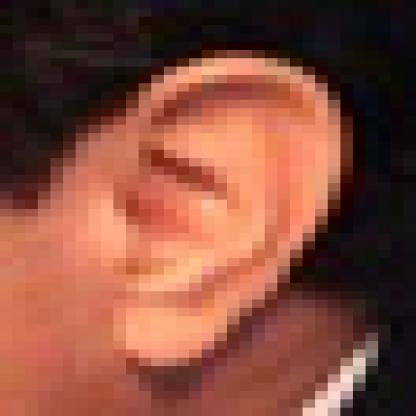

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread("/content/datasets/ear_rec_yolov3-2/test/1/0249tr_jpg.rf.cad8275c4656dacfb92514f213a883da.jpg")
cv2_imshow(img)


### Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 100 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
2024-05-14 13:42:38.119153: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 13:42:38.119199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 13:42:38.217305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
classify/train: model=yolov5s-cls.pt, data=ear_rec_yolov3-2, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_ra

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/ear_rec_yolov3-2, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4294788 parameters, 0 gradients, 10.5 GFLOPs
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
testing: 100% 1/1 [00:01<00:00,  1.96s/it]
                   Class      Images    top1_acc    top5_acc
                     all         116     0.00862      0.0345
                       1           2           0           0
                      10           2         0.5         0.5
                     100           3           0           0
            

### Infer With Your Custom Model

In [ ]:
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset.location, "test")):
  split_path = os.path.join(dataset.location, "test")
else:
  os.path.join(dataset.location, "valid")
example_class = os.listdir(split_path)[0]
example_image_name = os.listdir(os.path.join(split_path, example_class))[0]
example_image_path = os.path.join(split_path, example_class, example_image_name)
os.environ["TEST_IMAGE_PATH"] = example_image_path

print(f"Inferring on an example of the class '{example_class}'")

#Infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source $TEST_IMAGE_PATH

Inferring on an example of the class '78'
classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/datasets/ear_rec_yolov3-2/test/78/05642tr_jpg.rf.63de4caa55525adb6bd3d867396a1f8c.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4294788 parameters, 0 gradients, 10.5 GFLOPs
image 1/1 /content/datasets/ear_rec_yolov3-2/test/78/05642tr_jpg.rf.63de4caa55525adb6bd3d867396a1f8c.jpg: 224x224 3 0.02, 50 0.01, 54 0.01, 97 0.01, 12 0.01, 3.2ms
Speed: 0.3ms pre-process, 3.2ms inference, 26.2ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp3


We can see the inference results show ~3ms inference and the respective classes predicted probabilities.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
# # Upload example image
# project.upload(image_path)


In [ ]:
# # Example upload code
# min_conf = float("inf")
# for pred in results:
#     if pred["score"] < min_conf:
#         min_conf = pred["score"]
# if min_conf < 0.4:
#     project.upload(image_path)

# (BONUS) YOLOv5 classify/predict.py Accepts Several Input Methods
- Webcam: `python classify/predict.py --weights yolov5s-cls.pt --source 0`
- Image `python classify/predict.py --weights yolov5s-cls.pt --source img.jpg`
- Video: `python classify/predict.py --weights yolov5s-cls.pt --source vid.mp4`
- Directory: `python classify/predict.py --weights yolov5s-cls.pt --source path/`
- Glob: `python classify/predict.py --weights yolov5s-cls.pt --source 'path/*.jpg'`
- YouTube: `python classify/predict.py --weights yolov5s-cls.pt --source 'https://youtu.be/Zgi9g1ksQHc'`
- RTSP, RTMP, HTTP stream: `python classify/predict.py --weights yolov5s-cls.pt --source 'rtsp://example.com/media.mp4'`

###Directory Example

In [ ]:
#Directory infer
os.environ["TEST_CLASS_PATH"] = test_class_path = os.path.join(*os.environ["TEST_IMAGE_PATH"].split(os.sep)[:-1])
print(f"Infering on all images from the directory {os.environ['TEST_CLASS_PATH']}")
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /$TEST_CLASS_PATH/

Infering on all images from the directory content/datasets/ear_rec_yolov3-2/test/78
classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/datasets/ear_rec_yolov3-2/test/78/, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4294788 parameters, 0 gradients, 10.5 GFLOPs
image 1/1 /content/datasets/ear_rec_yolov3-2/test/78/05642tr_jpg.rf.63de4caa55525adb6bd3d867396a1f8c.jpg: 224x224 3 0.02, 50 0.01, 54 0.01, 97 0.01, 12 0.01, 3.1ms
Speed: 0.3ms pre-process, 3.1ms inference, 34.8ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp4


###YouTube Example

In [ ]:
#YouTube infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source 'https://www.youtube.com/watch?v=7AlYA4ItA74'